In [1]:
# !로 시작하는 명령은 terminal 명령
!pip list | findstr seaborn

seaborn                   0.13.2


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

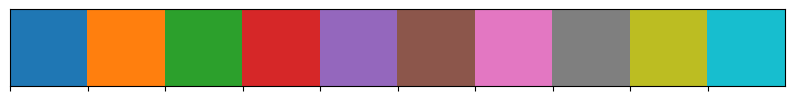

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

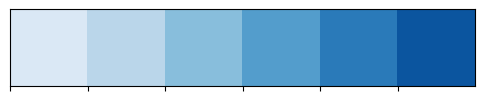

In [4]:
sns.palplot(sns.color_palette("Blues"))

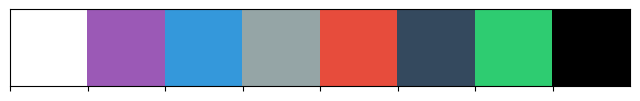

In [5]:
flatui = ['#ffffff', "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#000000"]
sns.palplot(sns.color_palette(flatui))


In [ ]:
# 두 변수 사이의 관계 표현
tips = sns.load_dataset("tips") # 내장 데이터셋 가져오기
print( type( tips ) )
tips.info()
tips.head()

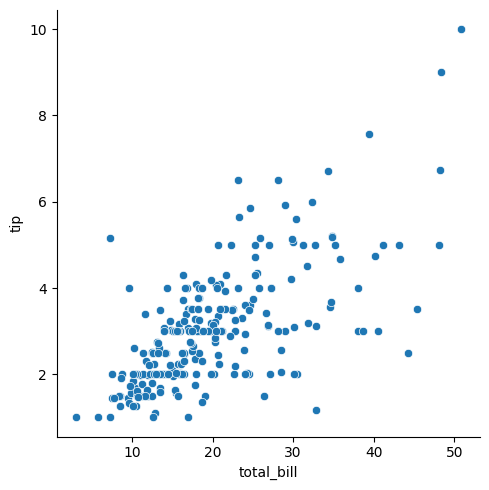

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips)

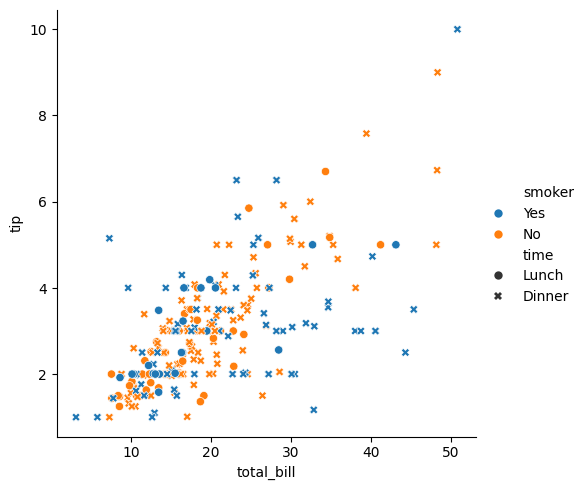

In [12]:
# 범주형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
# sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
plt.show()

[2 3 4 1 6 5]


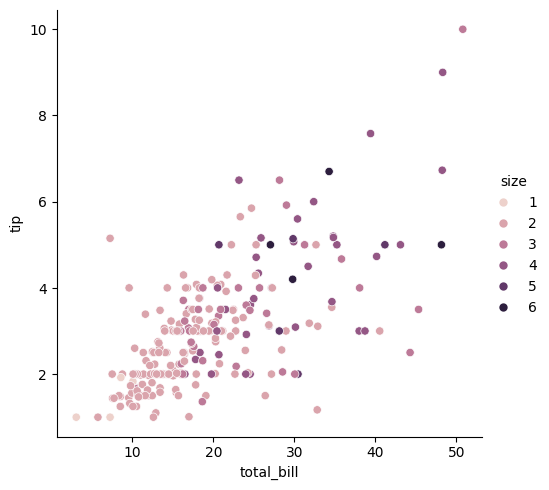

In [14]:
# 연속형 변수와 시각화 특성 바인딩
print(tips["size"].unique()) # size 컬럼의 값을 중복을 제거하고 출력
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
plt.show()


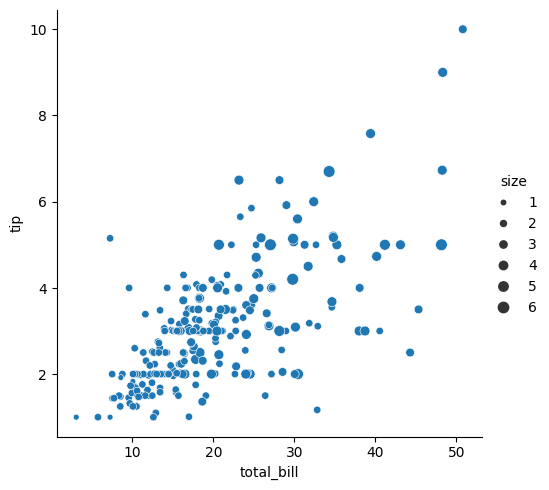

In [16]:
# 연속형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", size="size", data=tips)
plt.show()

In [ ]:
# 두 변수 사이의 관계
# 불확실성 표시
fmri = sns.load_dataset("fmri")
print( type(fmri) )
fmri.info()
fmri.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


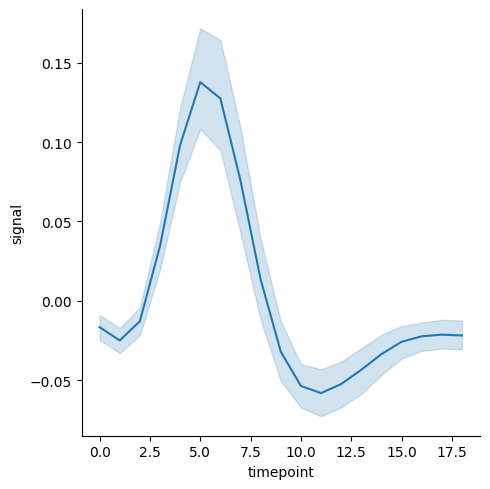

In [20]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
plt.show()

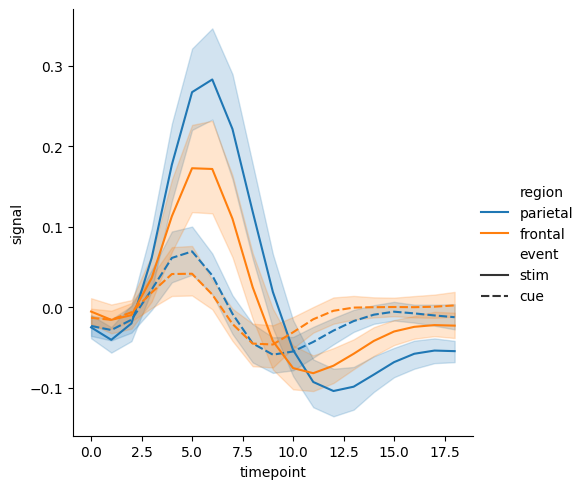

In [21]:
# 데이터와 시각화 특성 바인딩
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)
plt.show()

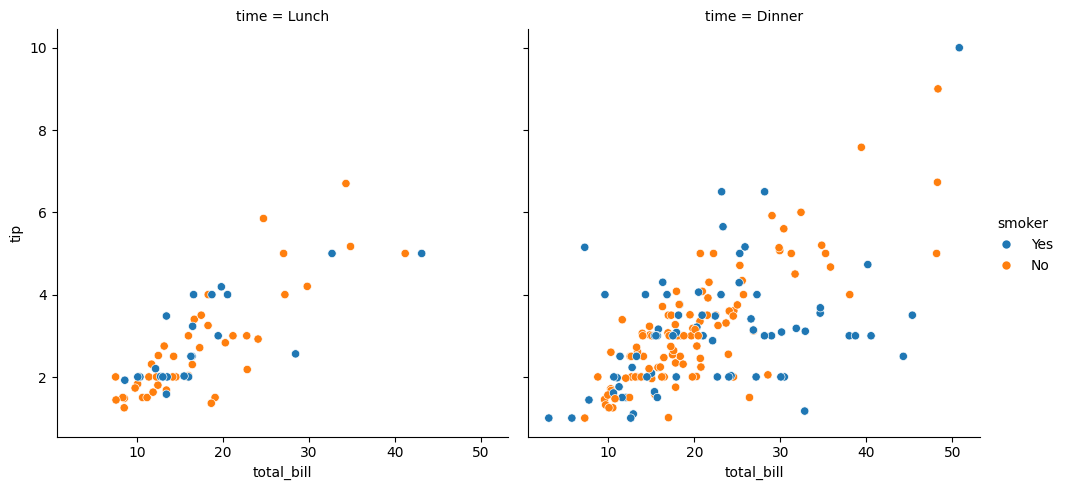

In [22]:
# 컬럼에 비교할 분류 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()

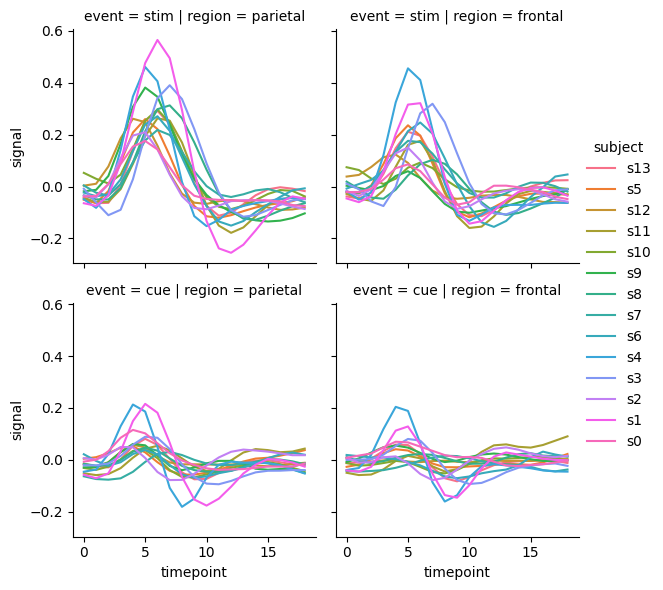

In [24]:
# 행과 열에 비교할 분류 바인딩
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)
plt.show()

In [32]:
fmri['region'].unique() # region 컬럼의 데이터를 중복을 제거하고 반환
# mask = fmri['region'] == 'frontal'
# fmri[mask]
fmri.query("region == 'frontal'") # 위 두 줄의 코드와 같은 효과

,subject,timepoint,event,region,signal
67,s0,0,stim,frontal,-0.021452
170,s2,6,stim,frontal,0.101050
267,s10,4,stim,frontal,0.030044
268,s11,4,stim,frontal,0.075957
269,s3,0,stim,frontal,0.011056
...,...,...,...,...,...
1058,s1,8,cue,frontal,-0.136059
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939


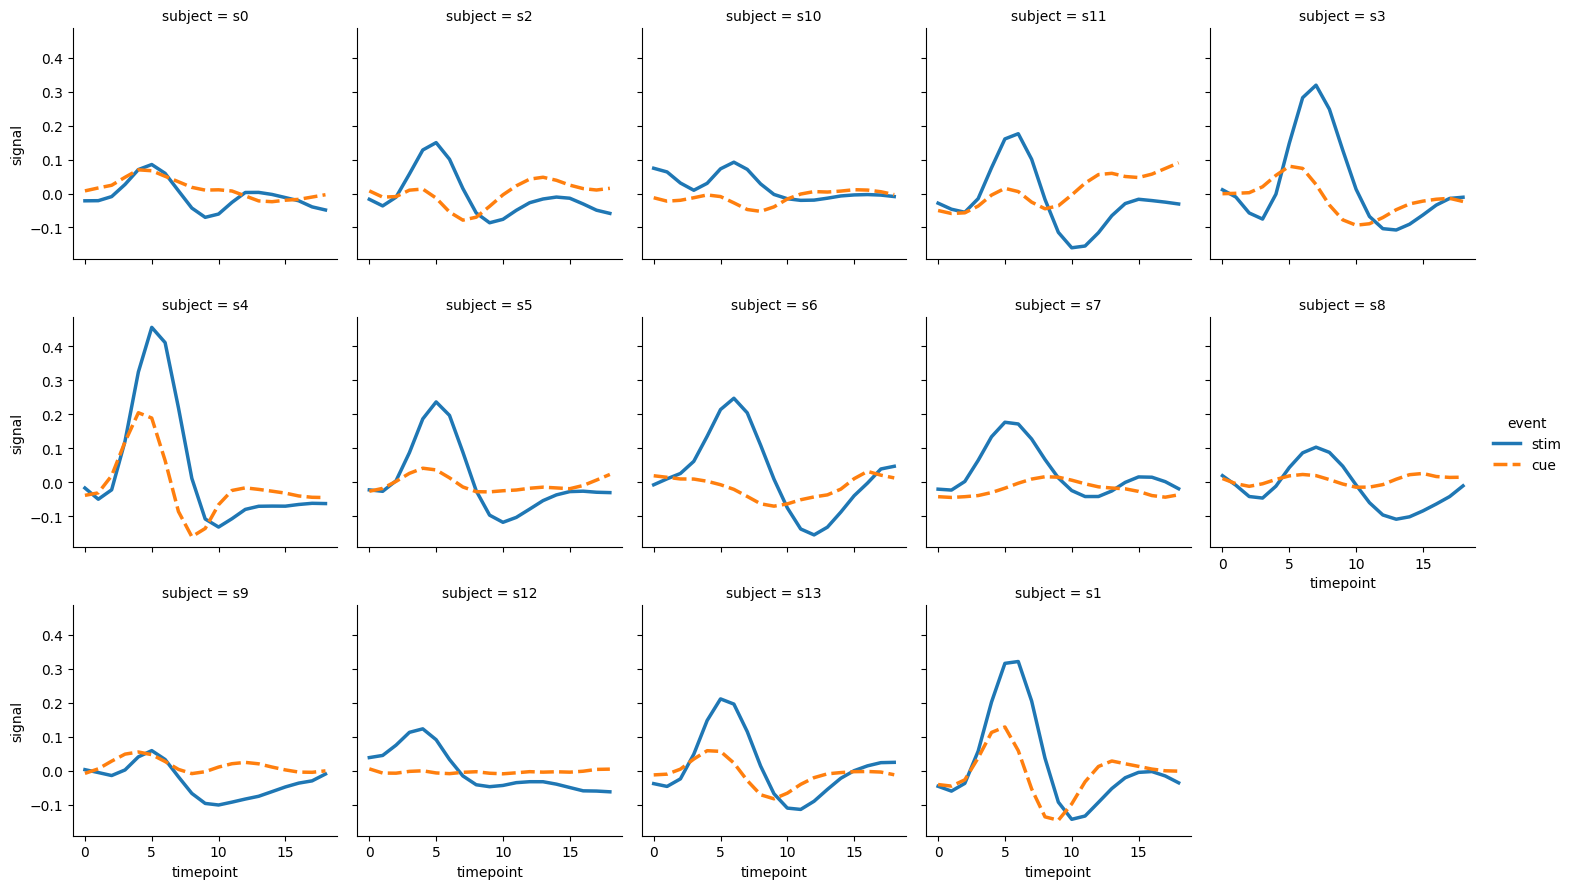

In [26]:
# 비교할 분류가 많은 경우 한 행에 표시할 최대 플롯 개수 지정 : wrap
sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
            col="subject", col_wrap=5, height=3, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

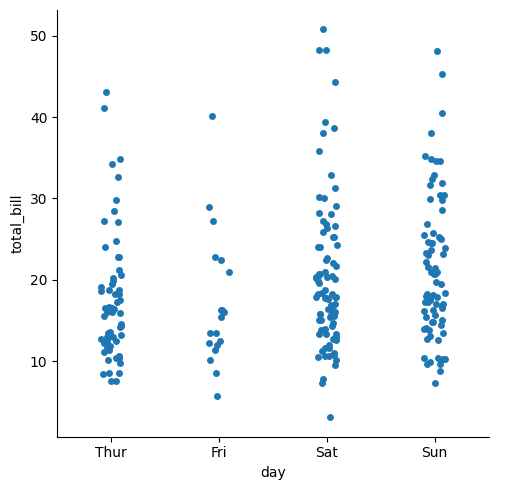

In [37]:
# 기본 범주 데이터 산점도 그래프
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips, jitter=True); # jitter : easing overplotting
plt.show

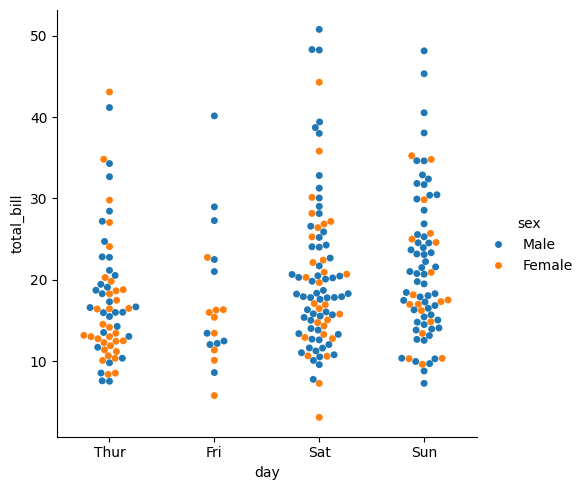

In [38]:
# 기본 범주 데이터 산점도 그래프
# beeswarm형 그래프
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips) # kind="swarm" : easing overplotting
plt.show()

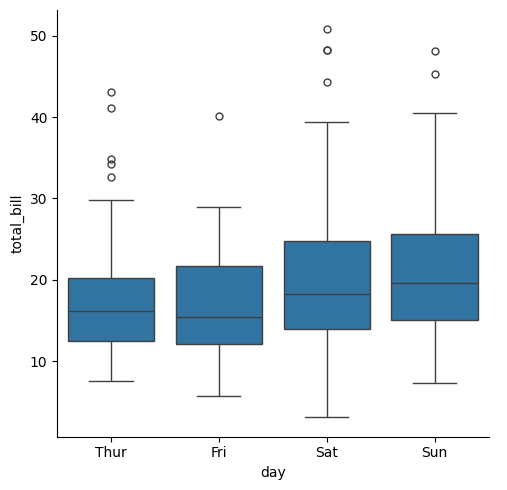

In [39]:
# 기본 박스 플롯
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()

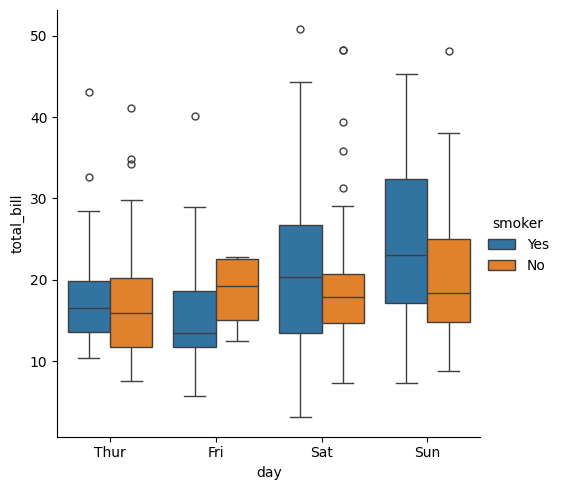

In [40]:
# 데이터와 시각화 요소 바인딩
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

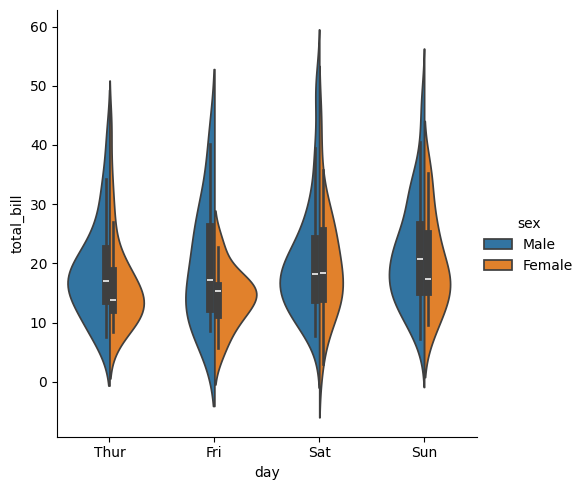

In [41]:
# 단일 바이올린 플롯
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()

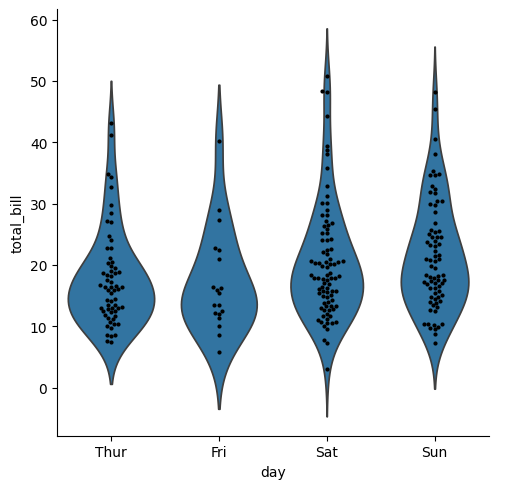

In [42]:
# 바이올린플롯과 범주데이터 산점도 그래프 병합 
g = sns.catplot(x="day", y="total_bill", kind="violin",inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)
plt.show()


In [ ]:
#Bar plot
titanic = sns.load_dataset("titanic")
titanic.info()
titanic.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


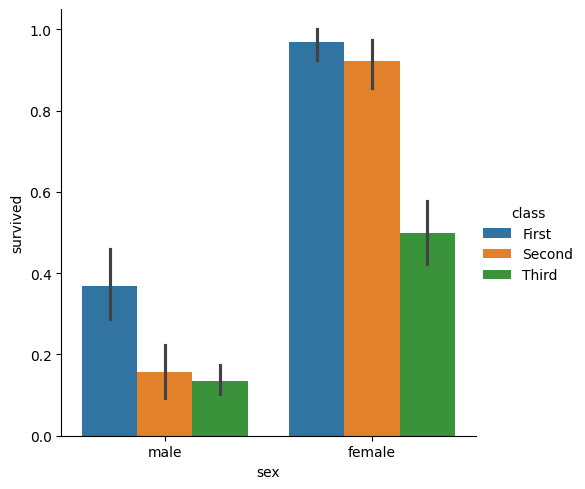

In [46]:
#Bar plot
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

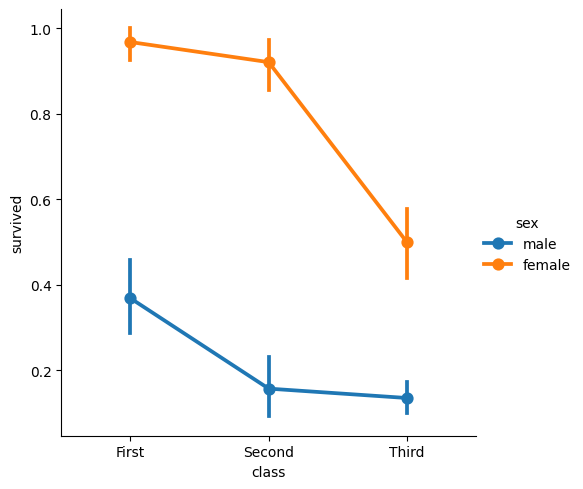

In [47]:
# Point plots
sns.catplot(x="class", y="survived", hue="sex", kind="point", data=titanic)
plt.show()

In [49]:
exercise = sns.load_dataset("exercise")
exercise.info()
exercise.head()

# sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


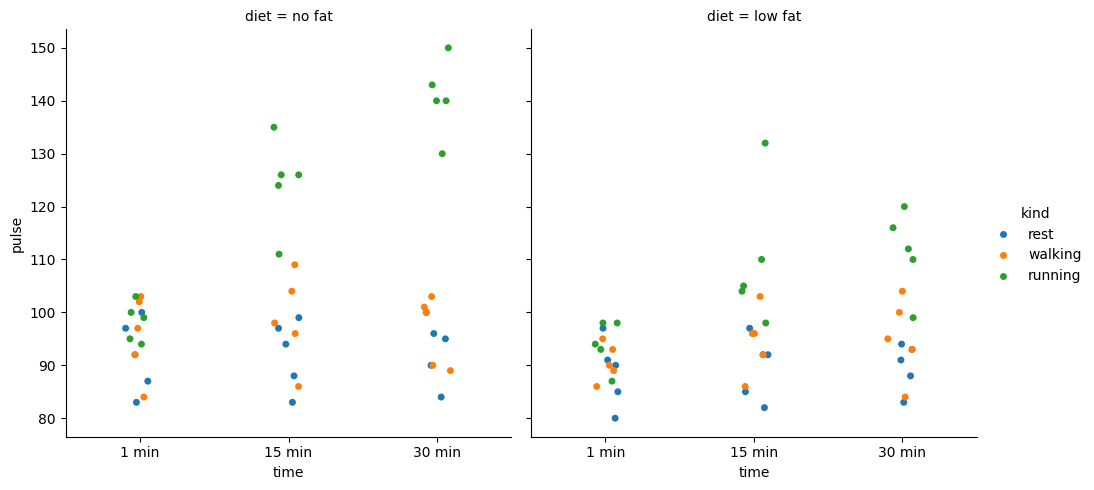

In [50]:
sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)
plt.show()

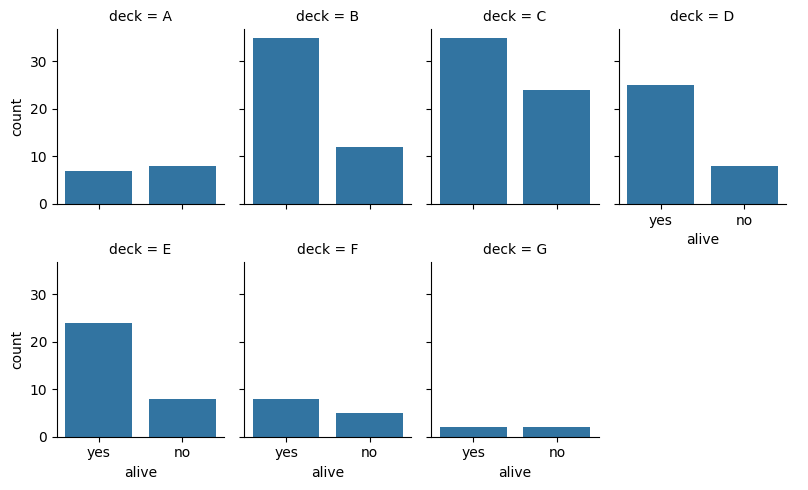

In [51]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="alive", col="deck", col_wrap=4, data=titanic[titanic.deck.notnull()], 
                kind="count", height=2.5, aspect=.8, )
plt.show()

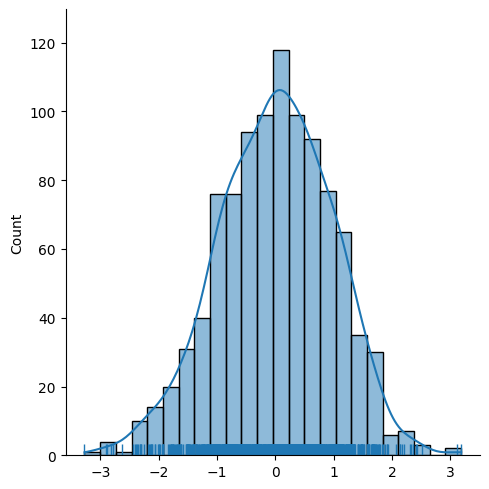

In [7]:
import numpy as np

# 일변량 분포 시각화
x = np.random.normal(size=1000) # 정규분포에서 난수를 표본 추출
# sns.distplot(x, bins=20, kde=True, rug=True); # kde : kernel density estimation
sns.displot(x, kind='hist', rug=True, kde=True)
# sns.histplot(x, kde=True)
plt.show()

In [59]:
iris = sns.load_dataset("iris")
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


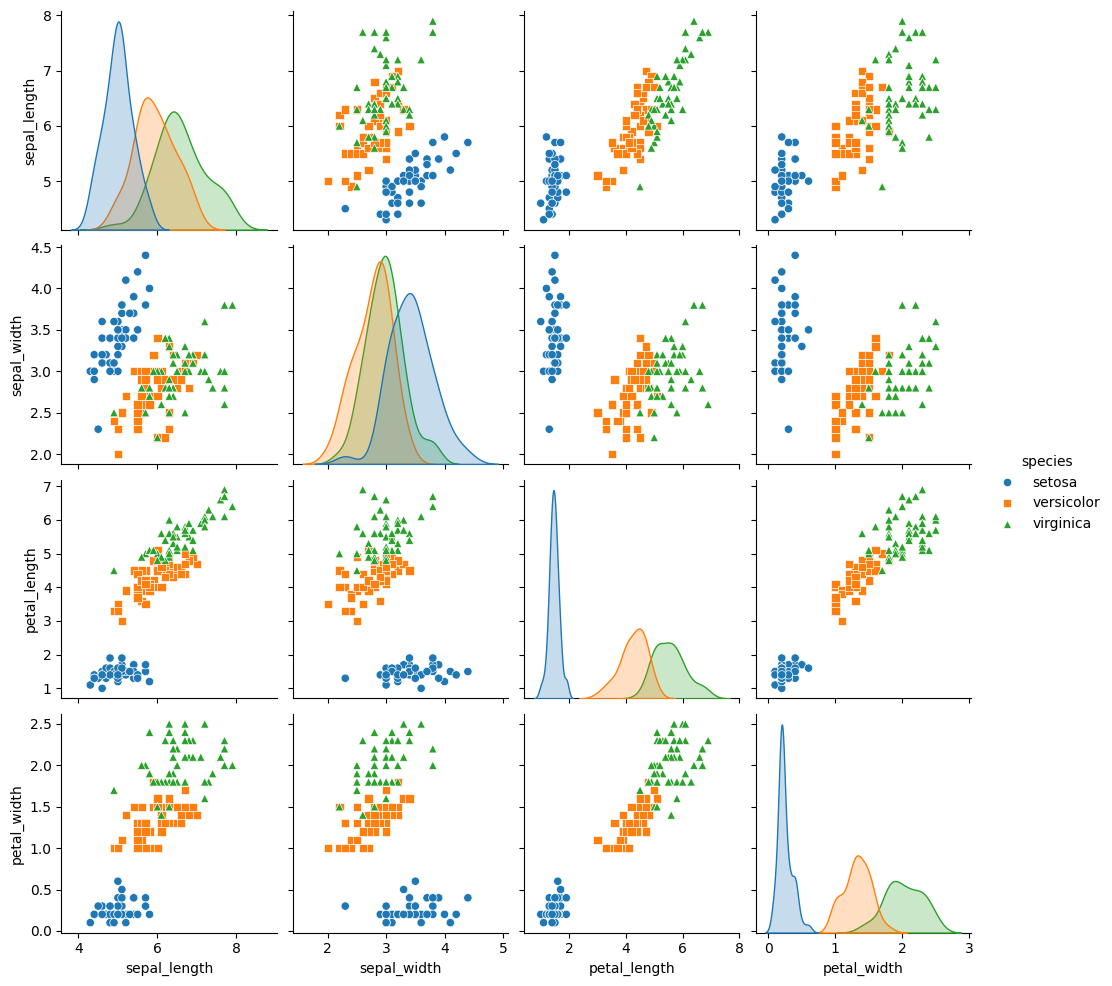

In [60]:
sns.pairplot(iris, hue="species", markers=["o", "s", "^"]) # markers는 hue를 지정했을 경우에만 사용 가능하며 hue에 지정된 컬럼의 데이터 범주의 개수와 일치
plt.show()

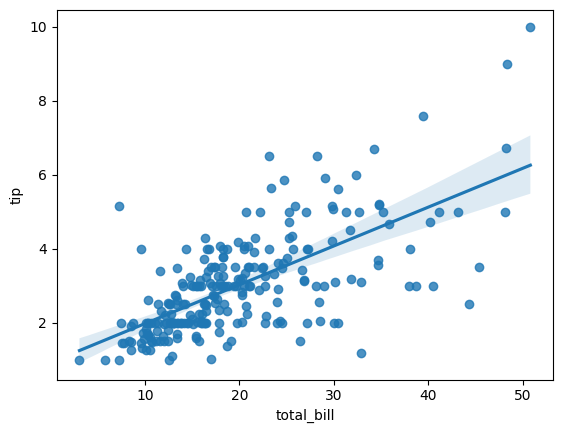

In [61]:
# 선형 관계 시각화
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

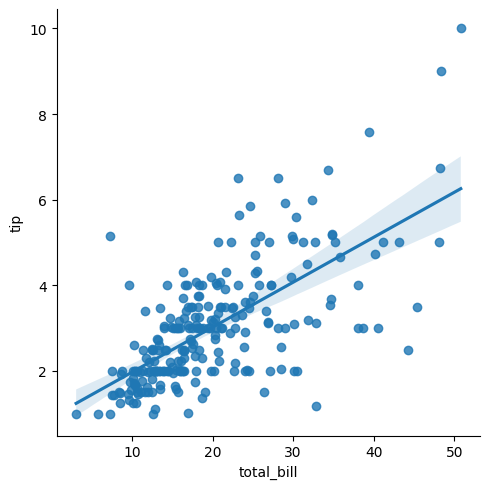

In [62]:
# 선형 관계 시각화
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()

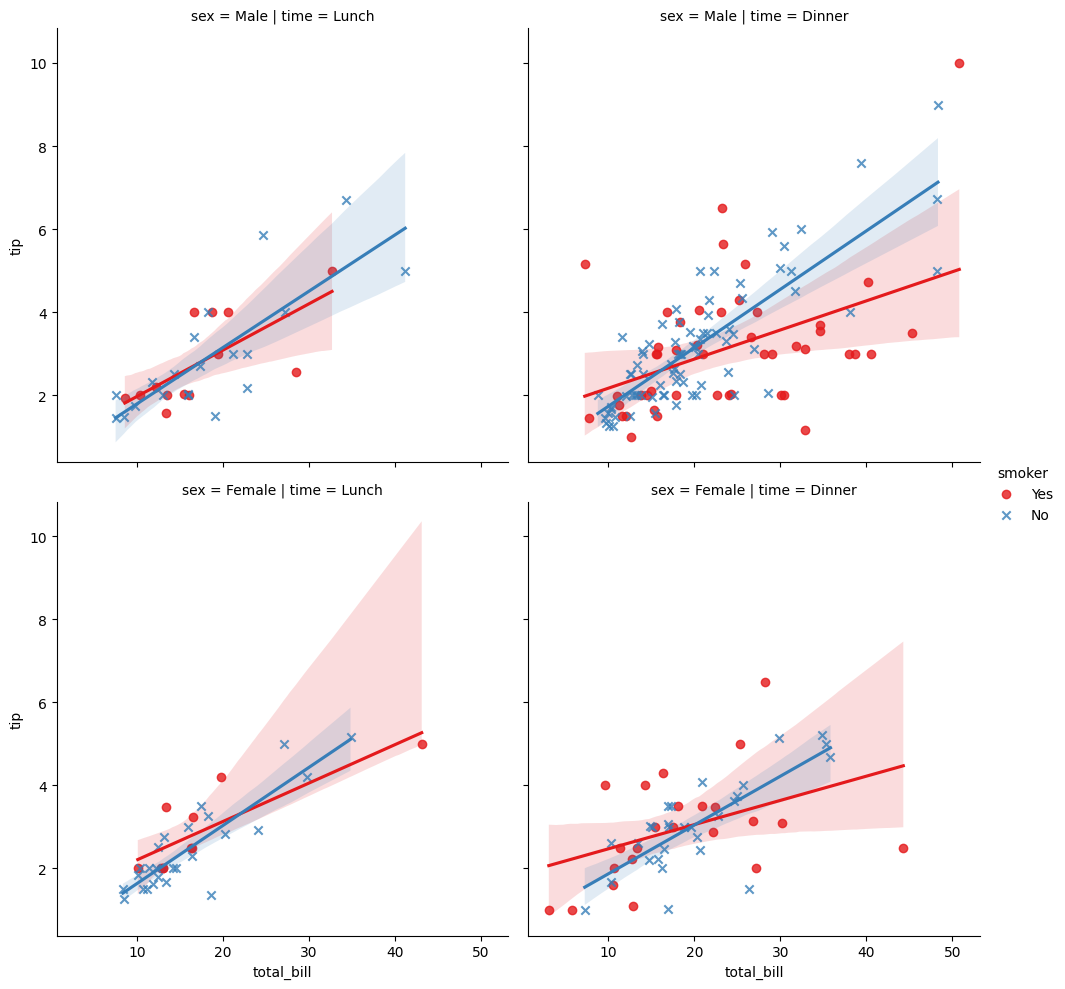

In [63]:
# 데이터와 시각화 속성 매핑
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o","x"], 
           palette="Set1", col="time", row="sex")

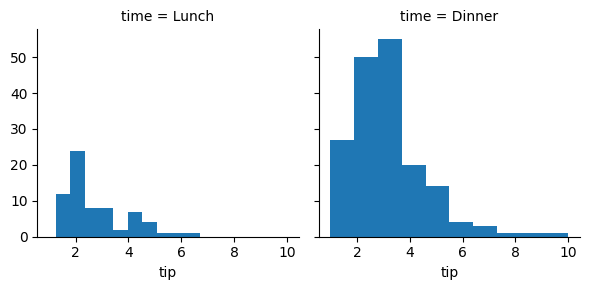

In [4]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")
plt.show()

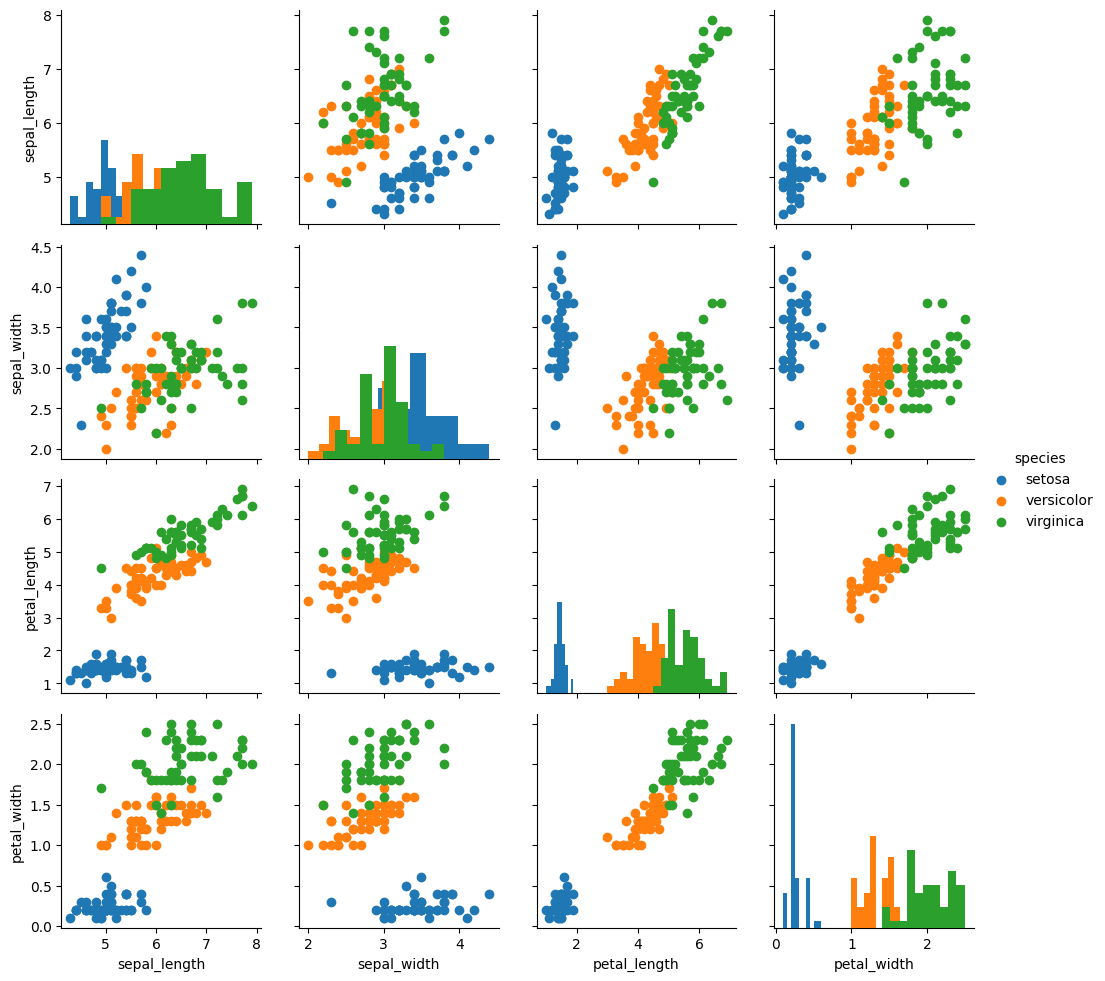

In [6]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [9]:
import pandas as pd

titanic = pd.read_csv('data-files/titanic-train.csv')

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

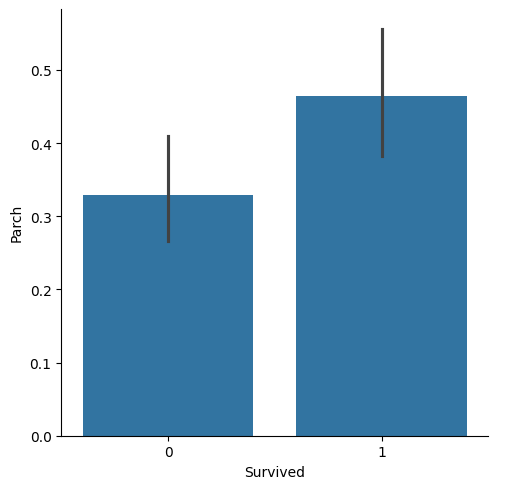

In [19]:
# sns.catplot(x='Survived', y='Age', kind="bar", data=titanic)
sns.catplot(x='Survived', y='Parch', kind="bar", data=titanic)
plt.show()